In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\runoff_seasonal_forecast-master')

from sf_runoff import feature_sel, loyo_cv_lc, create_it_matrix, daily_climatology

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt

import os

import pdb

In [2]:
path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'
# ## Feature selection
daily_input = pd.read_csv(path+'CANDOGLIA_TOCE_2000_2019.csv', index_col=0, parse_dates=True)

In [3]:
daily_clim = daily_climatology(daily_input)
it_matrix = create_it_matrix(daily_input, 12)

In [4]:
X = it_matrix.drop(columns=['Q'])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=100)
results = pca.fit_transform(X_scaled)

In [6]:
import seaborn as sns

<AxesSubplot:>

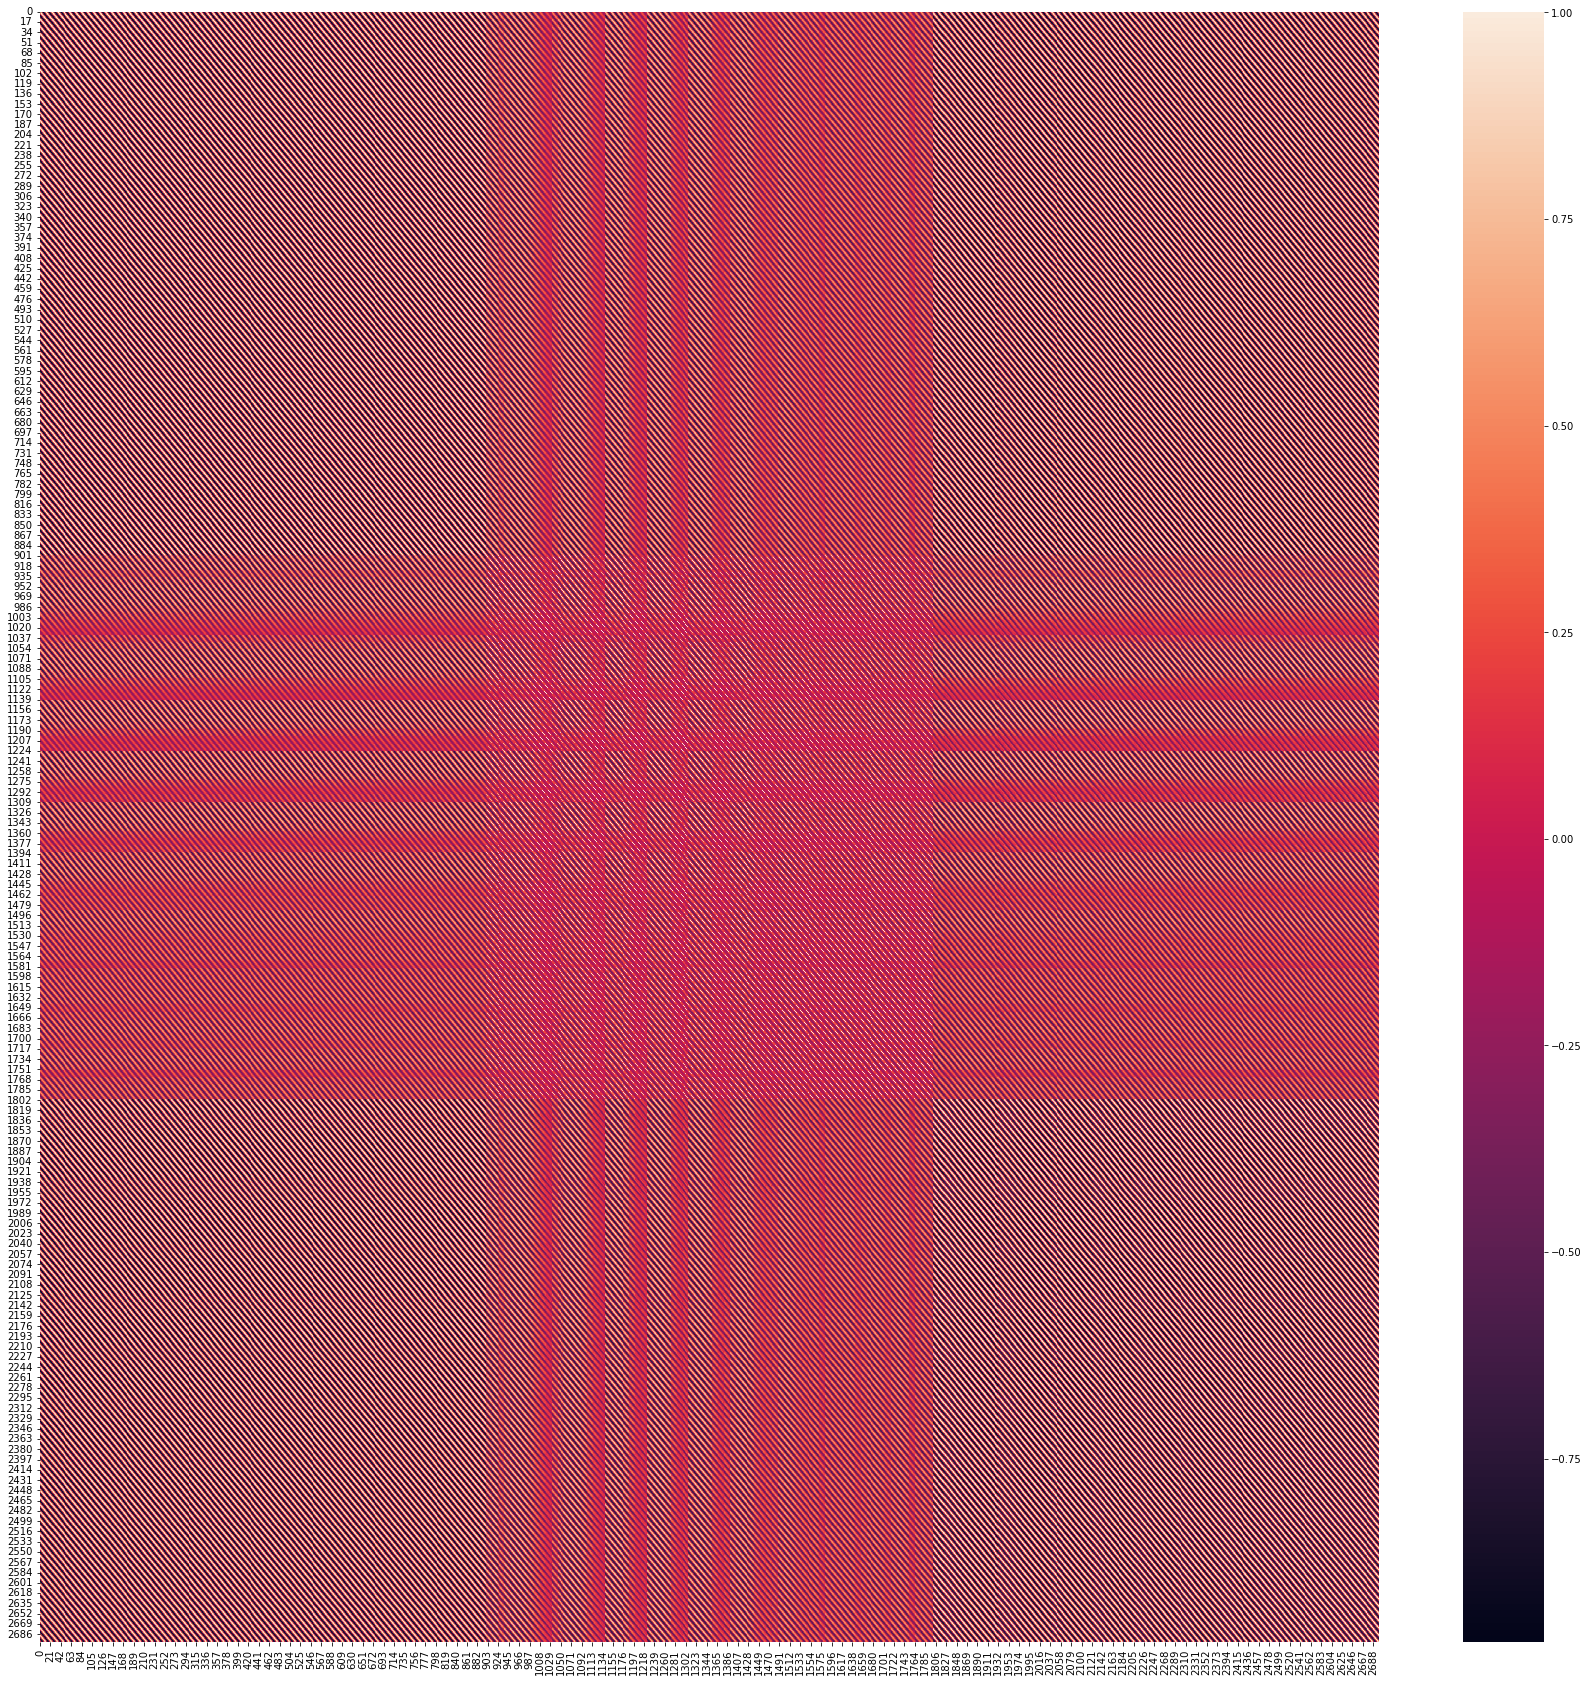

In [7]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(pca.get_covariance(),ax=ax,linewidths=0)

<AxesSubplot:>

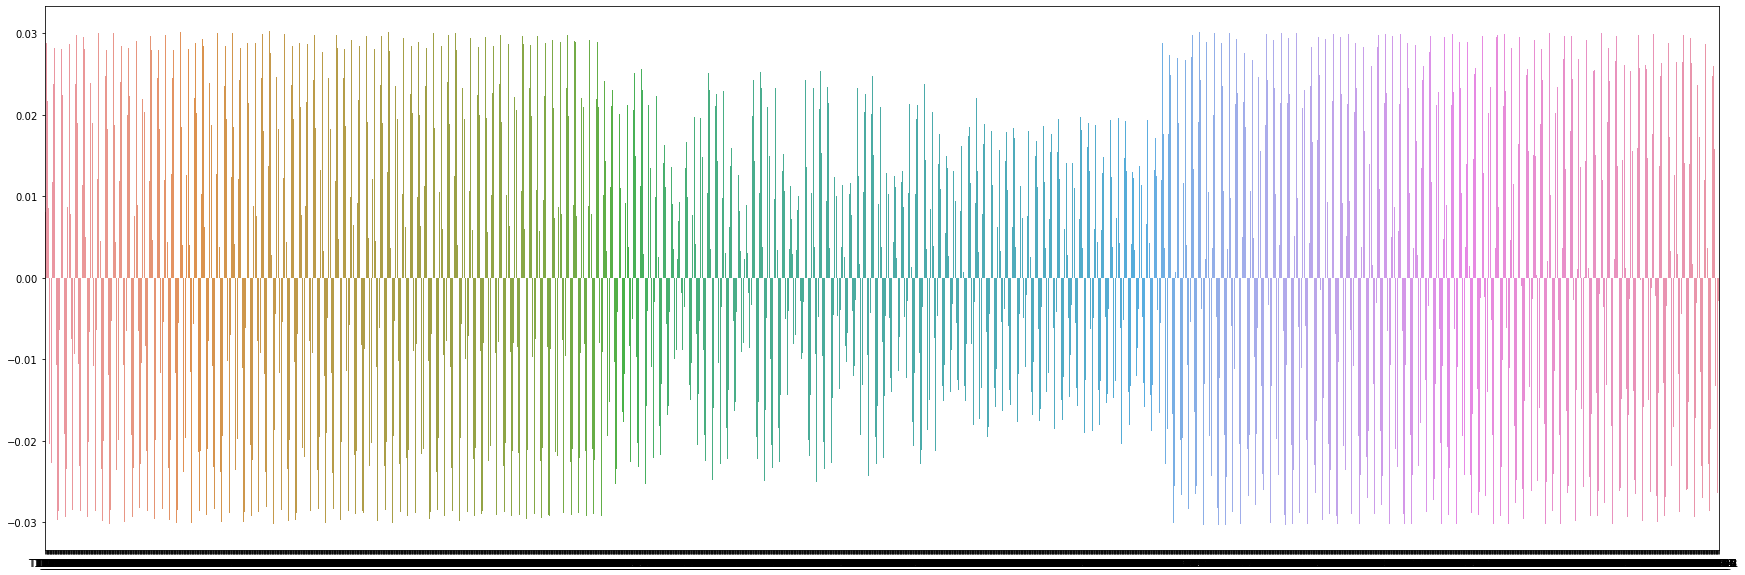

In [8]:
fig, ax = plt.subplots(figsize=(30,10))         # Sample figsize in inches
sns.barplot(y=pca.components_[0],x=X.columns,ax=ax)

In [17]:
it_matrix[[c for c in it_matrix.columns if c == '01']].columns

Index([], dtype='object')

In [27]:
for c in it_matrix.columns :
    if c[-1] == 0:
        print(c)

In [10]:
pca.explained_variance_

array([1.02977508e+03, 9.84082829e+02, 6.00393588e+01, 5.93022956e+01,
       5.52494608e+01, 5.24187914e+01, 4.85913867e+01, 4.26489598e+01,
       4.04857365e+01, 3.98332878e+01, 3.89192525e+01, 3.34140810e+01,
       2.94887707e+01, 2.87050859e+01, 2.69693192e+01, 2.63494283e+01,
       1.22518213e+01, 7.22355264e+00, 5.89422235e+00, 5.85604623e+00,
       5.08292599e+00, 4.98889646e+00, 4.79549381e+00, 4.48543628e+00,
       4.37707396e+00, 3.36099986e+00, 2.66800471e+00, 2.59877140e+00,
       2.38916675e+00, 2.21582805e+00, 1.41181606e+00, 1.26275266e+00,
       1.20352216e+00, 1.14046163e+00, 1.08727037e+00, 1.05038116e+00,
       1.04056968e+00, 9.96638373e-01, 9.80045909e-01, 9.54472767e-01,
       9.31539022e-01, 9.27321517e-01, 9.19013809e-01, 8.56838303e-01,
       8.37682642e-01, 8.30613796e-01, 8.17615479e-01, 7.98604120e-01,
       7.67105146e-01, 7.09328195e-01, 6.50197420e-01, 6.42308334e-01,
       6.22493322e-01, 5.86721202e-01, 5.79558547e-01, 5.46317586e-01,
      

In [13]:
Z

0.998915663761675